In [1]:
import geopandas as gpd
import pandas as pd
from shapely import wkt
import matplotlib.pyplot as plt
from pyproj import CRS

In [93]:
# Hämtad från:
# https://cartographyvectors.com/map/1521-sweden-with-regions
# Välj format GeoJSON
sweden_map = gpd.read_file('C:/Users/David/Documents/Anteckningar/Project in Data Science/Data/sweden-with-regions_.geojson')

In [2]:
# Load your CSV data and create a GeoDataFrame
df = pd.read_csv('C:/Users/David/Documents/Anteckningar/Project in Data Science/Data/gbg_trajectories_2019.csv', nrows=10000)
df['geometry'] = df['line'].apply(lambda x: wkt.loads(x))
gdf = gpd.GeoDataFrame(df, geometry='geometry')

# Define the current CRS of your linestring data (replace 'EPSG:XXXX' with your actual CRS)
# If you don't know the CRS, you can use the best guess, which is likely WGS 84 (EPSG:4326)
source_crs = CRS.from_epsg(3006)

# Set the CRS of the GeoDataFrame to match your linestring data
gdf.crs = source_crs

# Define the target CRS (WGS 84)
target_crs = CRS.from_epsg(4326)

# Reproject the GeoDataFrame to the target CRS
gdf = gdf.to_crs(target_crs)

FileNotFoundError: [Errno 2] No such file or directory: 'Data\\gbg_trajectories_2019.csv'

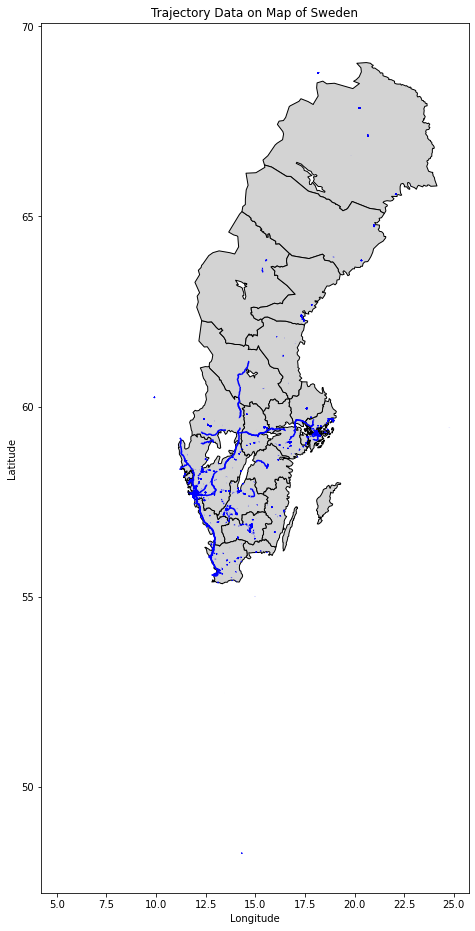

In [92]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(20, 16))

# Plot the Sweden map
sweden_map.plot(ax=ax, color='lightgray', edgecolor='black')

# Plot the trajectory data on top of the map
gdf.plot(ax=ax, color='blue', markersize=5)

# Customize the plot
ax.set_title('Trajectory Data on Map of Sweden')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show the plot
plt.show()